# Predictive Model for Customer Subscription

## 1. Business Problem
The main goal of this project is to build a predictive model to classify whether a customer will take up a sales offer or not. This will help to optimize marketing campaigns by targeting the right customers. The secondary goal is to assess the financial impact of using the model, by estimating the revenue gains and costs associated with campaign execution based on its predictions.

In [3]:
!pip3 install catboost
!pip install eli5
!pip install crucio
!pip install scikit-plot
!pip install flaml

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


#Import Libraries

#For data handling and preprocessing
import pandas as pd
import numpy as np

#For visualization
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline 


#For scaling dataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


#Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC 

#Model Evaluations
from sklearn import metrics
from sklearn.model_selection import train_test_split,cross_val_score

#For hyperparameter tuning 
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

#For metric score calculation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score,f1_score,roc_curve, roc_auc_score
from scikitplot.metrics import plot_roc_curve

#For model Explainability
# import eli5 as eli

# Model saving
import pickle

#For ignoring warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Loading and Understanding the Data

In [58]:
df = pd.read_csv('dataset.csv', sep='|')
df.head()

,Feature_ae_0,Feature_dn_1,Feature_cn_2,Feature_ps_3,Feature_ps_4,Feature_ee_5,Feature_cx_6,Feature_cx_7,Feature_em_8,Feature_nd_9,...,Feature_md_11,Feature_ed_12,Feature_dd_13,Feature_hd_14,Feature_ld_15,Feature_cd_16,Feature_md_17,Feature_dd_18,Feature_pd_19,Response
0,57,371,1,999,1,-1.80,92.89,-46.20,1.30,5099.10,...,Cat_1_m***d,Cat_3_h***l,Cat_0_n***o,Cat_0_n***o,Cat_2_y***s,Cat_0_c***r,Cat_6_m***y,Cat_1_m***n,Cat_0_f***e,0
1,55,285,2,999,0,1.10,93.99,-36.40,4.86,5191.00,...,Cat_1_m***d,Cat_7_u***n,Cat_1_u***n,Cat_2_y***s,Cat_0_n***o,Cat_1_t***e,Cat_6_m***y,Cat_2_t***u,Cat_1_n***t,0
2,33,52,1,999,1,-1.80,92.89,-46.20,1.31,5099.10,...,Cat_1_m***d,Cat_2_b***y,Cat_0_n***o,Cat_0_n***o,Cat_0_n***o,Cat_0_c***r,Cat_6_m***y,Cat_0_f***i,Cat_0_f***e,0
3,36,355,4,999,0,1.40,94.47,-41.80,4.97,5228.10,...,Cat_1_m***d,Cat_3_h***l,Cat_0_n***o,Cat_0_n***o,Cat_0_n***o,Cat_1_t***e,Cat_4_j***n,Cat_0_f***i,Cat_1_n***t,0
4,27,189,2,999,0,1.40,93.92,-42.70,4.96,5228.10,...,Cat_1_m***d,Cat_3_h***l,Cat_0_n***o,Cat_2_y***s,Cat_0_n***o,Cat_0_c***r,Cat_3_j***l,Cat_0_f***i,Cat_1_n***t,0


In [59]:
print("Shape of the dataset: {}".format(df.shape))

Shape of the dataset: (35000, 21)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Feature_ae_0   35000 non-null  int64  
 1   Feature_dn_1   35000 non-null  int64  
 2   Feature_cn_2   35000 non-null  int64  
 3   Feature_ps_3   35000 non-null  int64  
 4   Feature_ps_4   35000 non-null  int64  
 5   Feature_ee_5   35000 non-null  float64
 6   Feature_cx_6   35000 non-null  float64
 7   Feature_cx_7   35000 non-null  float64
 8   Feature_em_8   35000 non-null  float64
 9   Feature_nd_9   35000 non-null  float64
 10  Feature_jd_10  35000 non-null  object 
 11  Feature_md_11  35000 non-null  object 
 12  Feature_ed_12  35000 non-null  object 
 13  Feature_dd_13  35000 non-null  object 
 14  Feature_hd_14  35000 non-null  object 
 15  Feature_ld_15  35000 non-null  object 
 16  Feature_cd_16  35000 non-null  object 
 17  Feature_md_17  35000 non-null  object 
 18  Featur

In [8]:
print("Number of duplicate rows: ", df.duplicated().sum())
print("Percentage of duplicate rows: ", (df.duplicated().sum()/len(df))*100)
df[df.duplicated()].count()

Number of duplicate rows:  11
Percentage of duplicate rows:  0.031428571428571424


Feature_ae_0     11
Feature_dn_1     11
Feature_cn_2     11
Feature_ps_3     11
Feature_ps_4     11
Feature_ee_5     11
Feature_cx_6     11
Feature_cx_7     11
Feature_em_8     11
Feature_nd_9     11
Feature_jd_10    11
Feature_md_11    11
Feature_ed_12    11
Feature_dd_13    11
Feature_hd_14    11
Feature_ld_15    11
Feature_cd_16    11
Feature_md_17    11
Feature_dd_18    11
Feature_pd_19    11
Response         11
dtype: int64

In [9]:
df[df.duplicated()]

,Feature_ae_0,Feature_dn_1,Feature_cn_2,Feature_ps_3,Feature_ps_4,Feature_ee_5,Feature_cx_6,Feature_cx_7,Feature_em_8,Feature_nd_9,...,Feature_md_11,Feature_ed_12,Feature_dd_13,Feature_hd_14,Feature_ld_15,Feature_cd_16,Feature_md_17,Feature_dd_18,Feature_pd_19,Response
7217,55,33,1,999,0,1.4,93.444,-36.1,4.965,5228.1,...,Cat_1_m***d,Cat_3_h***l,Cat_1_u***n,Cat_0_n***o,Cat_0_n***o,Cat_0_c***r,Cat_1_a***g,Cat_1_m***n,Cat_1_n***t,0
13226,32,128,1,999,0,1.4,93.918,-42.7,4.968,5228.1,...,Cat_2_s***e,Cat_5_p***e,Cat_0_n***o,Cat_2_y***s,Cat_0_n***o,Cat_0_c***r,Cat_3_j***l,Cat_2_t***u,Cat_1_n***t,0
15237,35,348,4,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,Cat_1_m***d,Cat_6_u***e,Cat_0_n***o,Cat_2_y***s,Cat_0_n***o,Cat_0_c***r,Cat_6_m***y,Cat_0_f***i,Cat_1_n***t,0
22628,27,331,2,999,0,1.4,93.918,-42.7,4.962,5228.1,...,Cat_2_s***e,Cat_5_p***e,Cat_0_n***o,Cat_0_n***o,Cat_0_n***o,Cat_0_c***r,Cat_3_j***l,Cat_1_m***n,Cat_1_n***t,0
23883,71,120,1,999,0,-3.4,92.431,-26.9,0.742,5017.5,...,Cat_2_s***e,Cat_6_u***e,Cat_0_n***o,Cat_0_n***o,Cat_0_n***o,Cat_1_t***e,Cat_8_o***t,Cat_3_t***e,Cat_1_n***t,0
25182,45,252,1,999,0,-2.9,92.469,-33.6,1.072,5076.2,...,Cat_1_m***d,Cat_6_u***e,Cat_0_n***o,Cat_0_n***o,Cat_0_n***o,Cat_0_c***r,Cat_3_j***l,Cat_2_t***u,Cat_1_n***t,1
30101,36,88,1,999,0,1.4,93.918,-42.7,4.966,5228.1,...,Cat_1_m***d,Cat_7_u***n,Cat_0_n***o,Cat_0_n***o,Cat_0_n***o,Cat_1_t***e,Cat_3_j***l,Cat_2_t***u,Cat_1_n***t,0
30802,39,124,1,999,0,1.1,93.994,-36.4,4.855,5191.0,...,Cat_1_m***d,Cat_1_b***y,Cat_0_n***o,Cat_0_n***o,Cat_0_n***o,Cat_1_t***e,Cat_6_m***y,Cat_2_t***u,Cat_1_n***t,0
31587,41,127,1,999,0,1.4,93.444,-36.1,4.966,5228.1,...,Cat_1_m***d,Cat_5_p***e,Cat_0_n***o,Cat_2_y***s,Cat_0_n***o,Cat_0_c***r,Cat_1_a***g,Cat_3_t***e,Cat_1_n***t,0
33631,47,43,3,999,0,1.4,93.918,-42.7,4.962,5228.1,...,Cat_0_d***d,Cat_3_h***l,Cat_0_n***o,Cat_2_y***s,Cat_0_n***o,Cat_0_c***r,Cat_3_j***l,Cat_2_t***u,Cat_1_n***t,0


Without a unique customer identifier, it is possible that the "duplicate" records represent two different customers who happen to have the exact same features. Given the small number of duplicates (11 out of 35,000), the risk of losing valid data by dropping them outweighs the minimal benefit of a cleaner dataset.

## 2. Understanding the Variables

### Variables Description

| Variable | Type | Description |
| :--- | :--- | :--- |
| **Feature_ae_0** | Numeric | Customer - Age of the customer |
| **Feature_dn_1** | Numeric | Telematics - Latest call duration (in seconds), measured during last sales call (only known after call has taken place) |
| **Feature_cn_2** | Numeric | Telematics - Number of call attempts made to the customer |
| **Feature_ps_3** | Numeric | Telematics - Number of days which passed since the last campaign (999 - no previous campaign) |
| **Feature_ps_4** | Numeric | Telematics - Number of call attempts made to the customer for the previous campaign |
| **Feature_ee_5** | Numeric | Macro variable - employment variation rate (Quarterly) |
| **Feature_cx_6** | Numeric | Macro variable - consumer price index (Monthly) |
| **Feature_cx_7** | Numeric | Macro variable - consumer confidence index (Monthly) |
| **Feature_em_8** | Numeric | Macro variable - 3 month interbank rate (Quarterly) |
| **Feature_nd_9** | Numeric | Macro variable - number of employees (Quarterly) |
| **Feature_jd_10** | Category | Customer - type of employment |
| **Feature_md_11** | Category | Customer - civil status |
| **Feature_ed_12** | Category | Customer - highest level of education |
| **Feature_dd_13** | Category | Customer - has some type of credit facility in default |
| **Feature_hd_14** | Category | Customer - has a home loan |
| **Feature_ld_15** | Category | Customer - has a personal loan |
| **Feature_cd_16** | Category | Customer - contact medium |
| **Feature_md_17** | Category | Telematics - month when last contacted |
| **Feature_dd_18** | Category | Telematics - day of the week when last contacted |
| **Feature_pd_19** | Category | Performance - outcome of the previous campaign |
| **Response** | Binary | Did the customer take up the offer? (1 = Yes, 0 = No) |

In [10]:
print("Summary statistics of the numeric features of the dataset:")
df.describe()

Summary statistics of the numeric features of the dataset:


,Feature_ae_0,Feature_dn_1,Feature_cn_2,Feature_ps_3,Feature_ps_4,Feature_ee_5,Feature_cx_6,Feature_cx_7,Feature_em_8,Feature_nd_9,Response
count,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000
mean,40.030571,257.838400,2.562200,962.432029,0.173714,0.080749,93.575801,-40.519114,3.619979,5167.038800,0.112286
std,10.428141,258.587889,2.767424,187.012184,0.495005,1.571101,0.578557,4.619948,1.734599,72.171997,0.315722
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,318.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


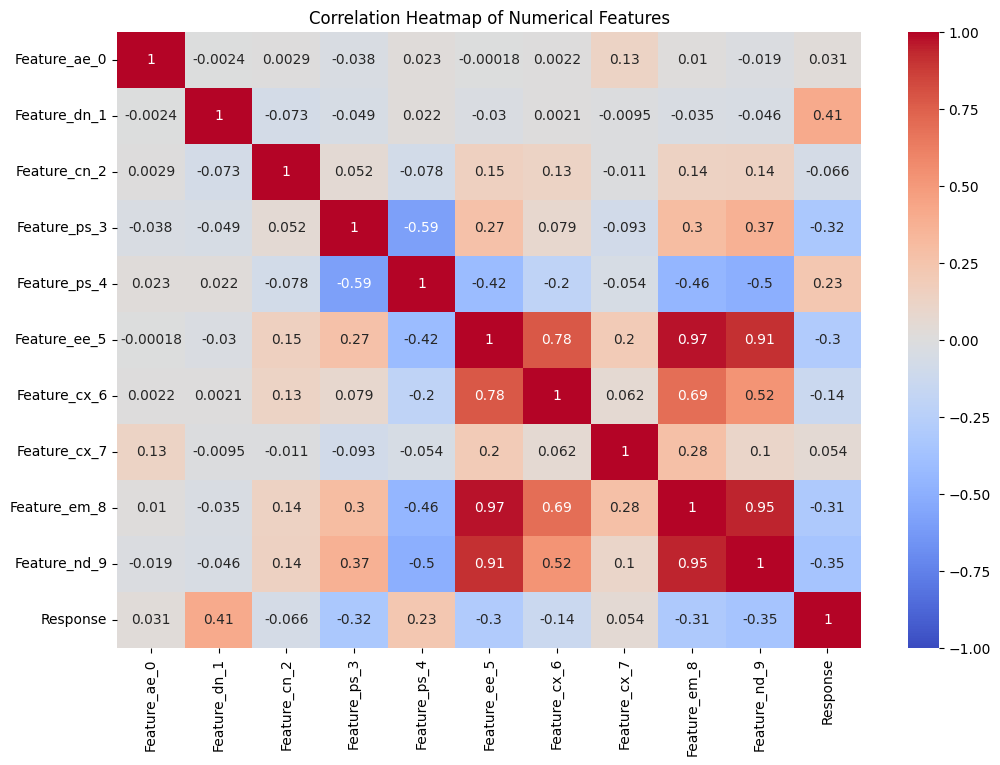

In [11]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
plt.title('Correlation Heatmap of Numerical Features')
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

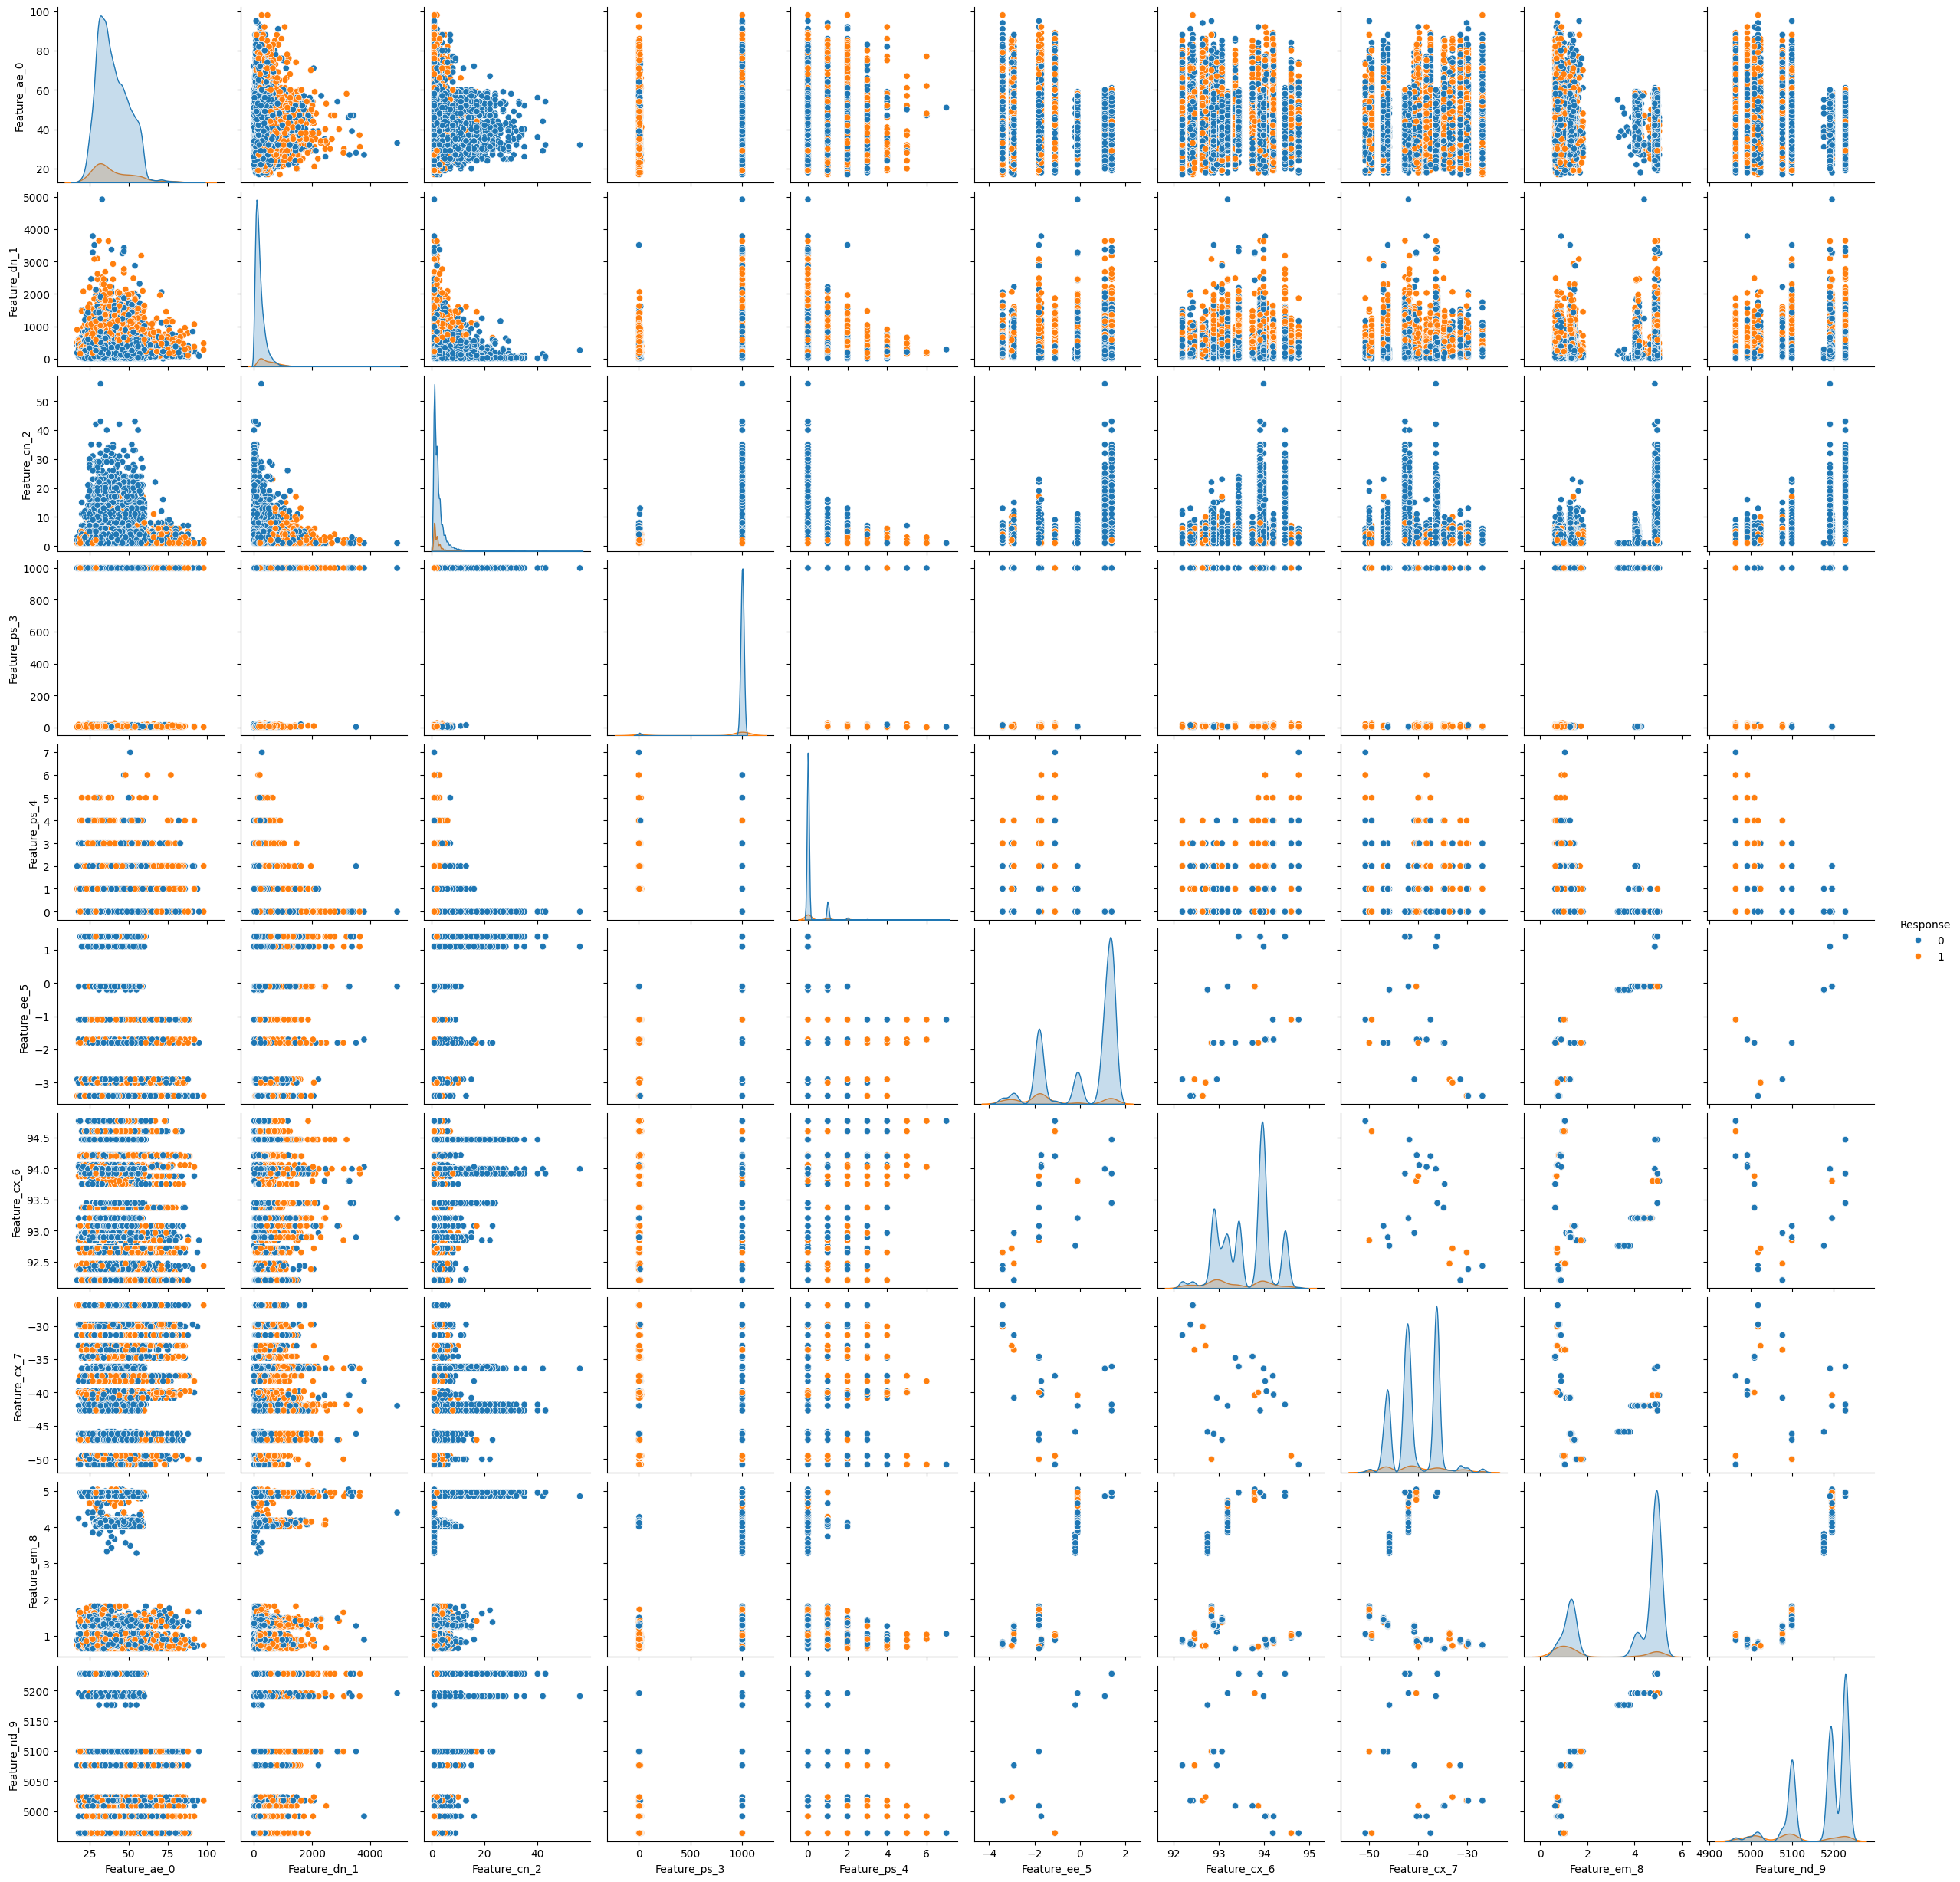

In [12]:
num_features = df.select_dtypes(include=['int64', 'float64']).columns

# Pairplot
sns.pairplot(df[num_features], hue='Response')
plt.show()

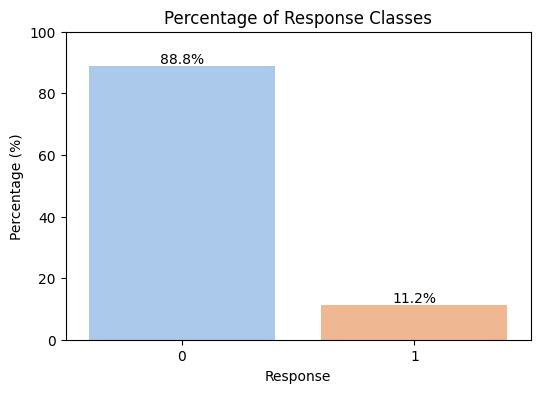

In [13]:
response_counts = df['Response'].value_counts(normalize=True) * 100

plt.figure(figsize=(6,4))
sns.barplot(x=response_counts.index, y=response_counts.values, palette="pastel")
plt.ylabel("Percentage (%)")
plt.title("Percentage of Response Classes")
plt.ylim(0, 100)
for i, val in enumerate(response_counts.values):
    plt.text(i, val + 1, f"{val:.1f}%", ha='center')
plt.show()

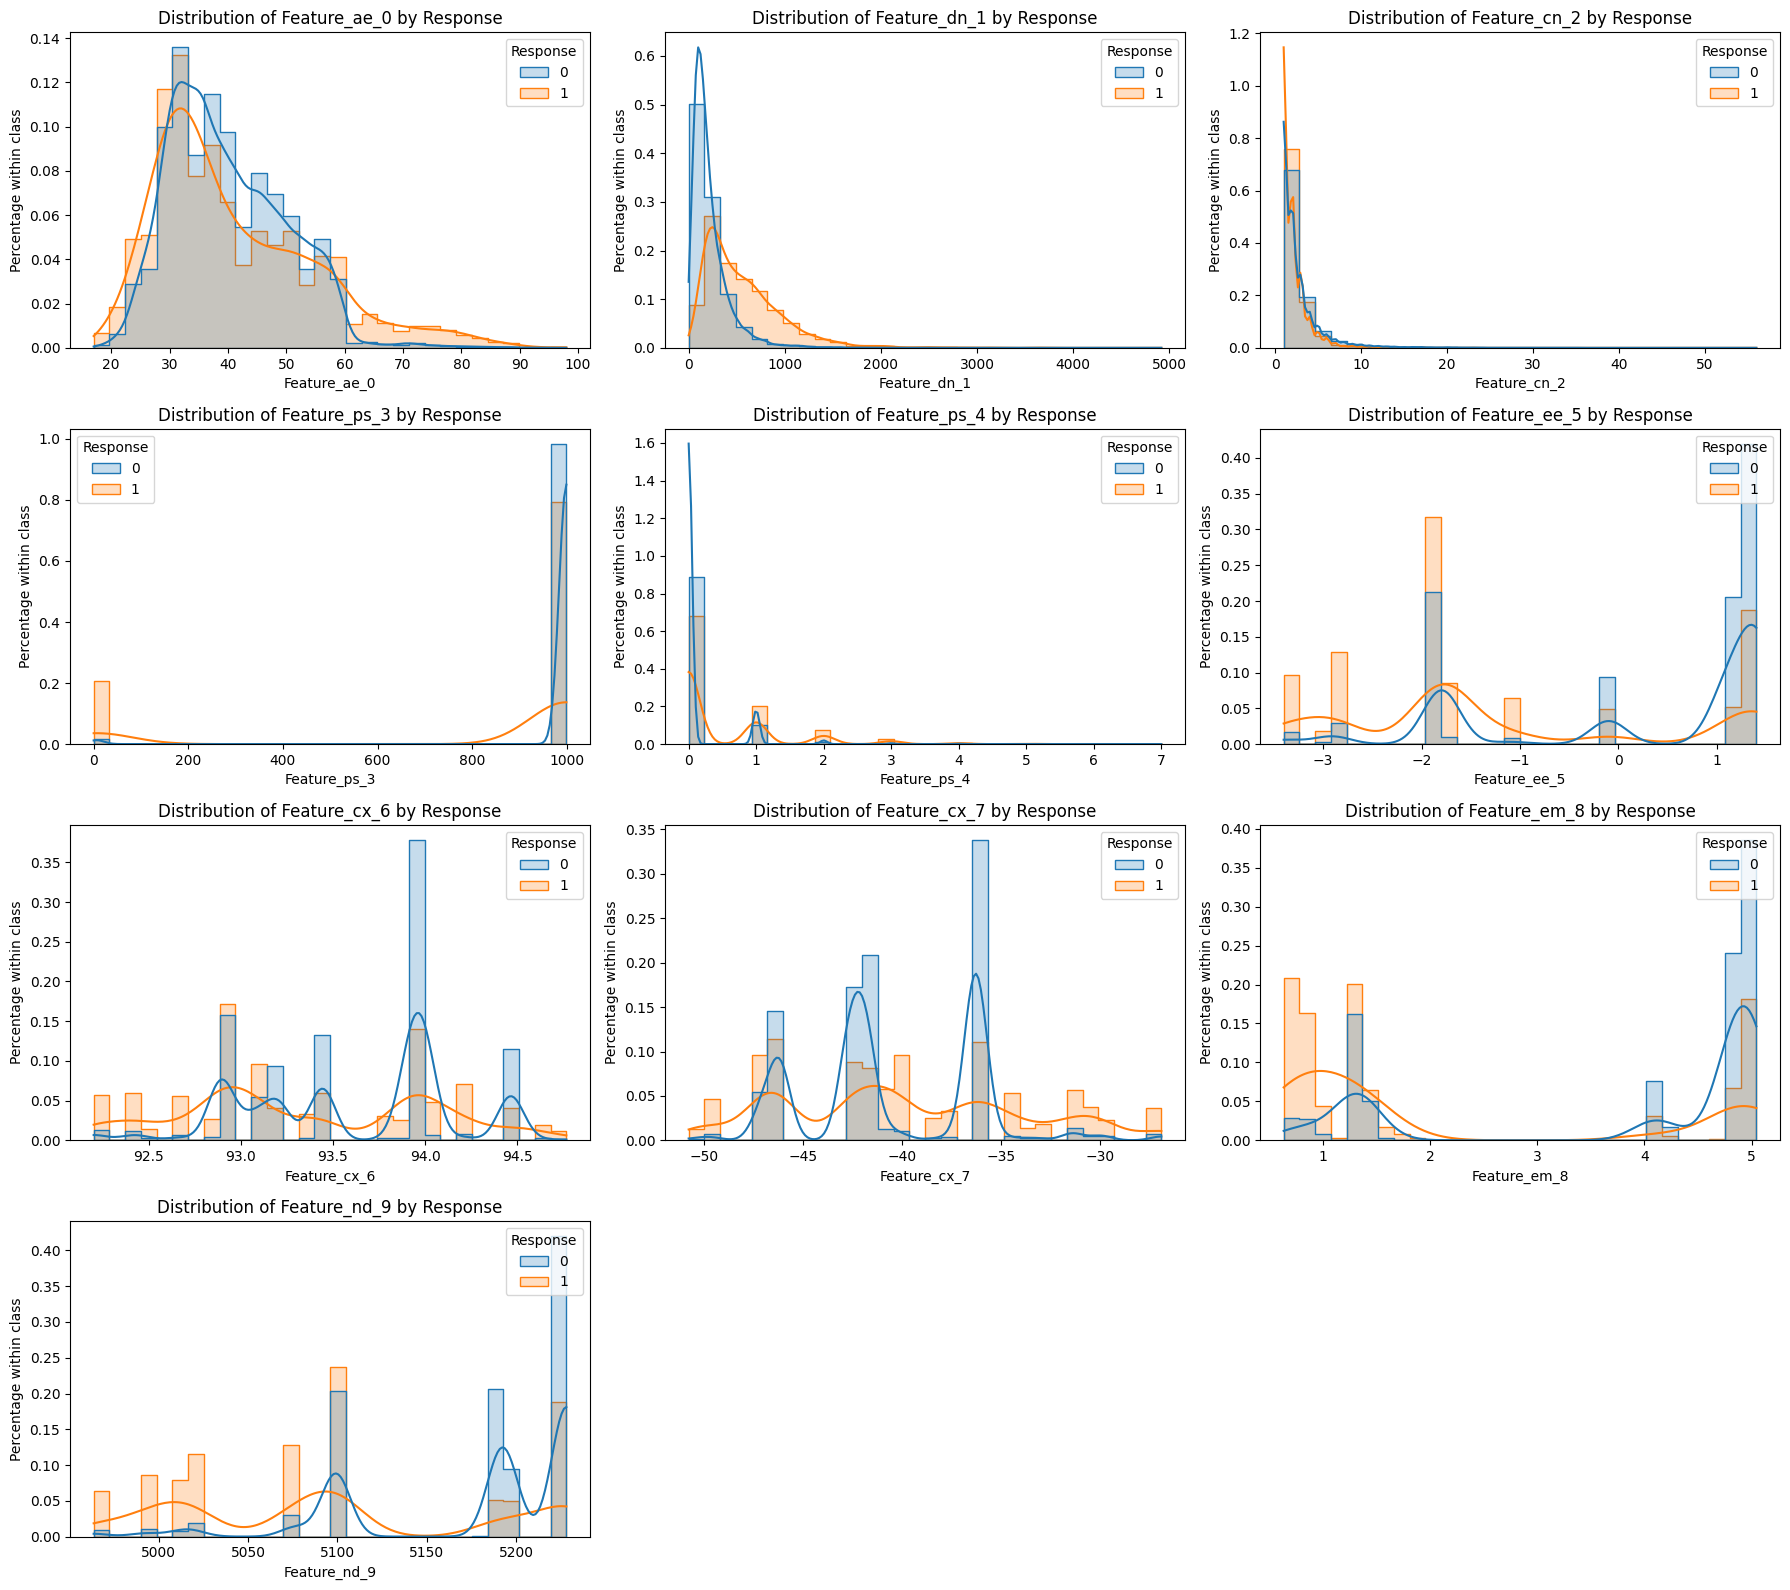

In [14]:
num_features = df.select_dtypes(include=['int64', 'float64']).columns.drop('Response', errors='ignore')

n_cols = 3
n_rows = 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.histplot(
        data=df,
        x=col,
        hue="Response",
        kde=True,
        bins=30,
        element="step",
        stat="probability",
        common_norm=False,
        ax=axes[i]
    )
    axes[i].set_title(f"Distribution of {col} by Response")
    axes[i].set_ylabel("Percentage within class")

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

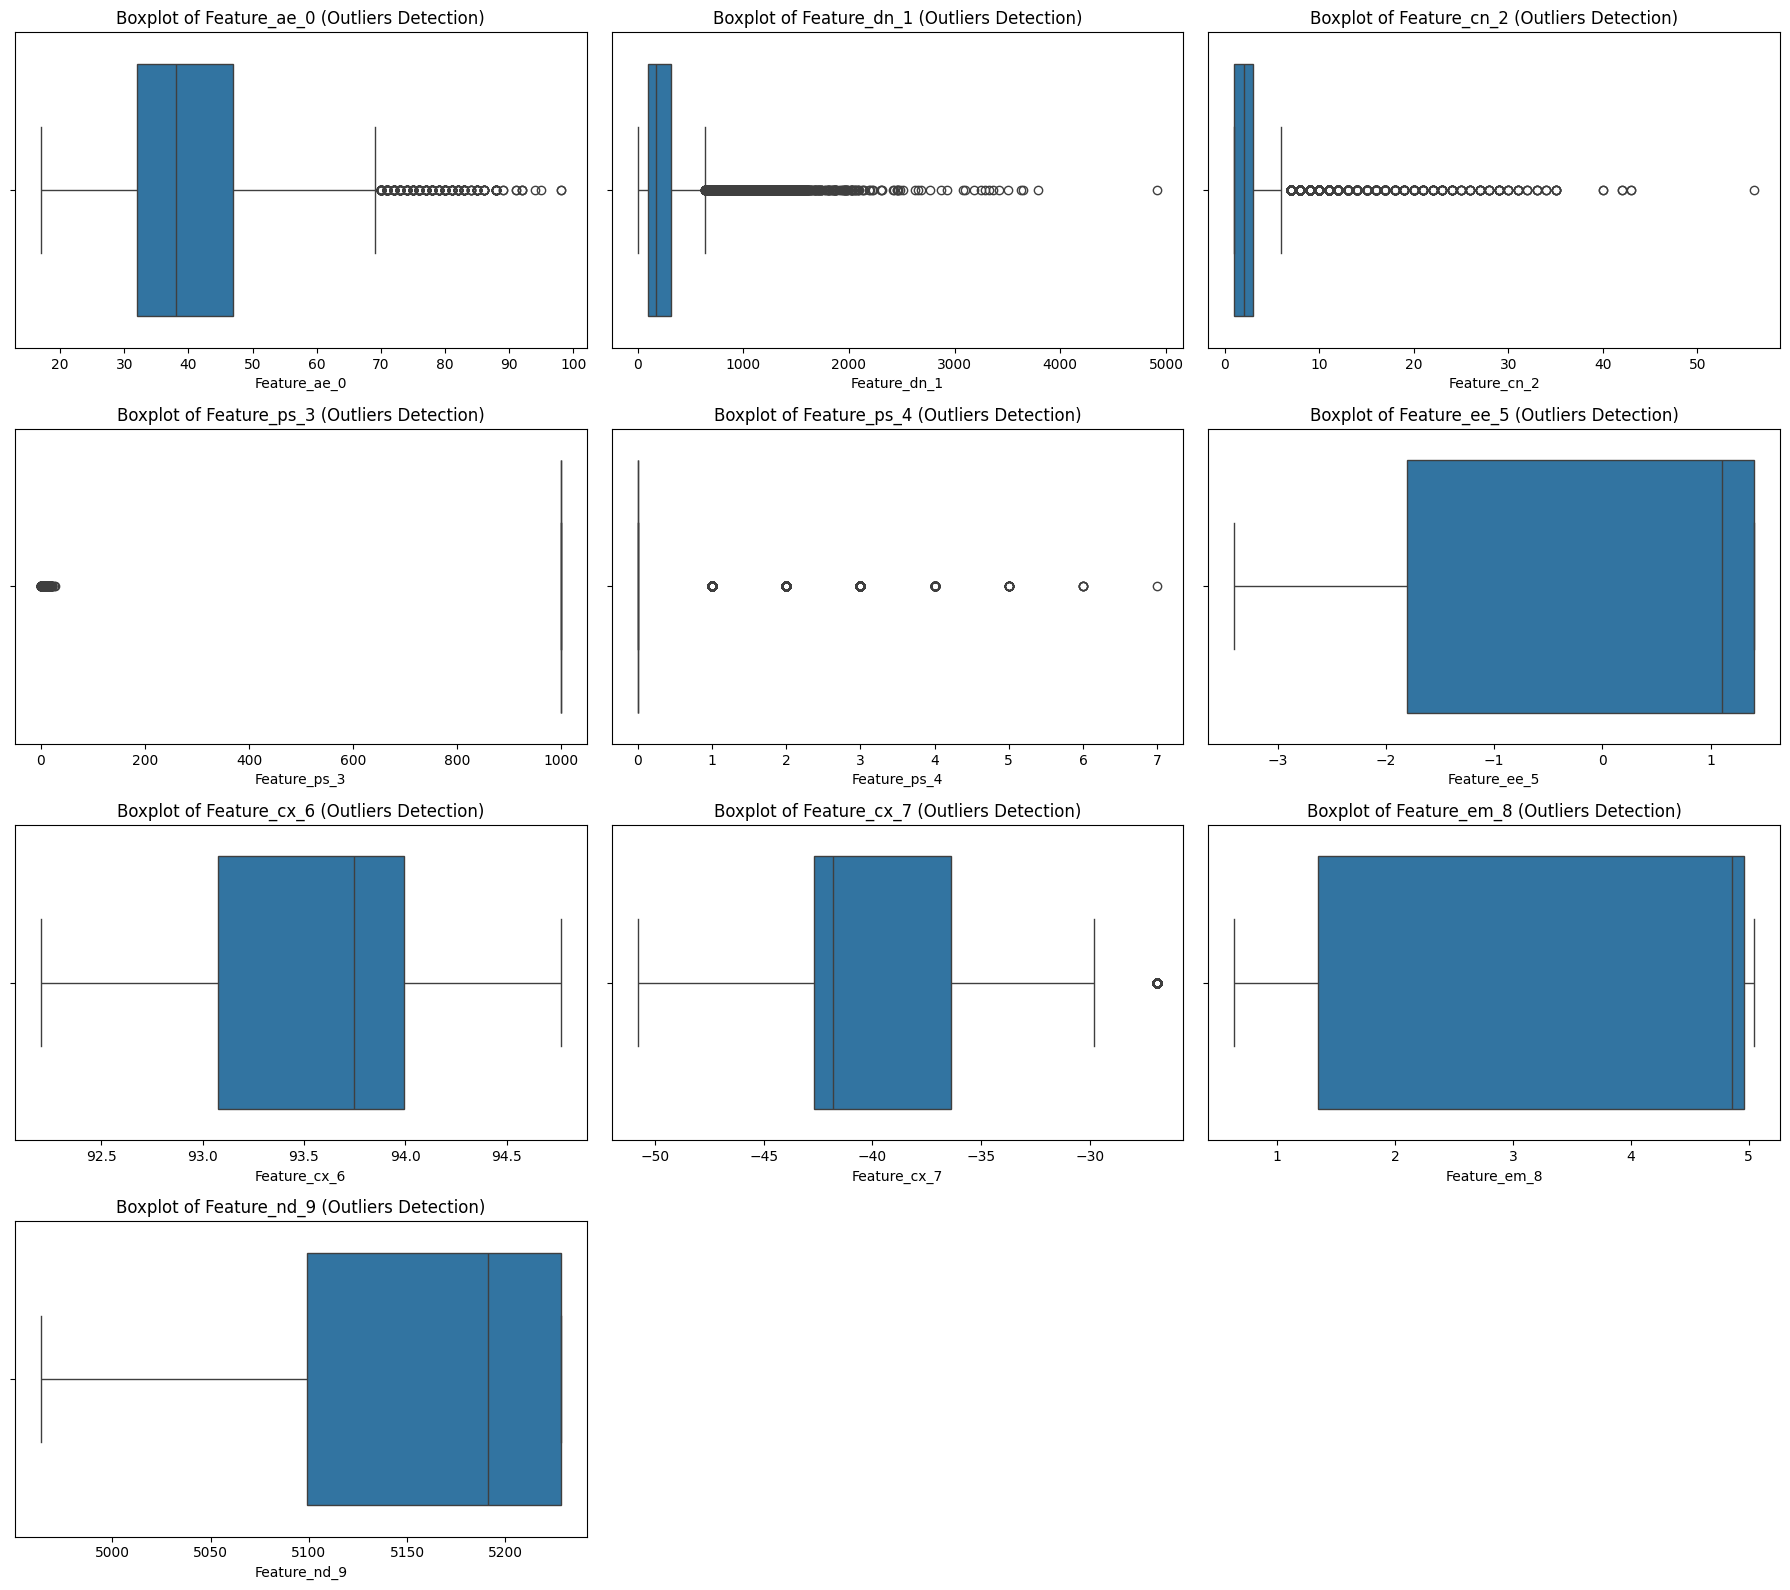

In [15]:
n_cols = 3
n_rows = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.boxplot(
        x=df[col],
        orient='h',
        ax=axes[i]
    )
    axes[i].set_title(f"Boxplot of {col} (Outliers Detection)")
    axes[i].set_xlabel(col)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

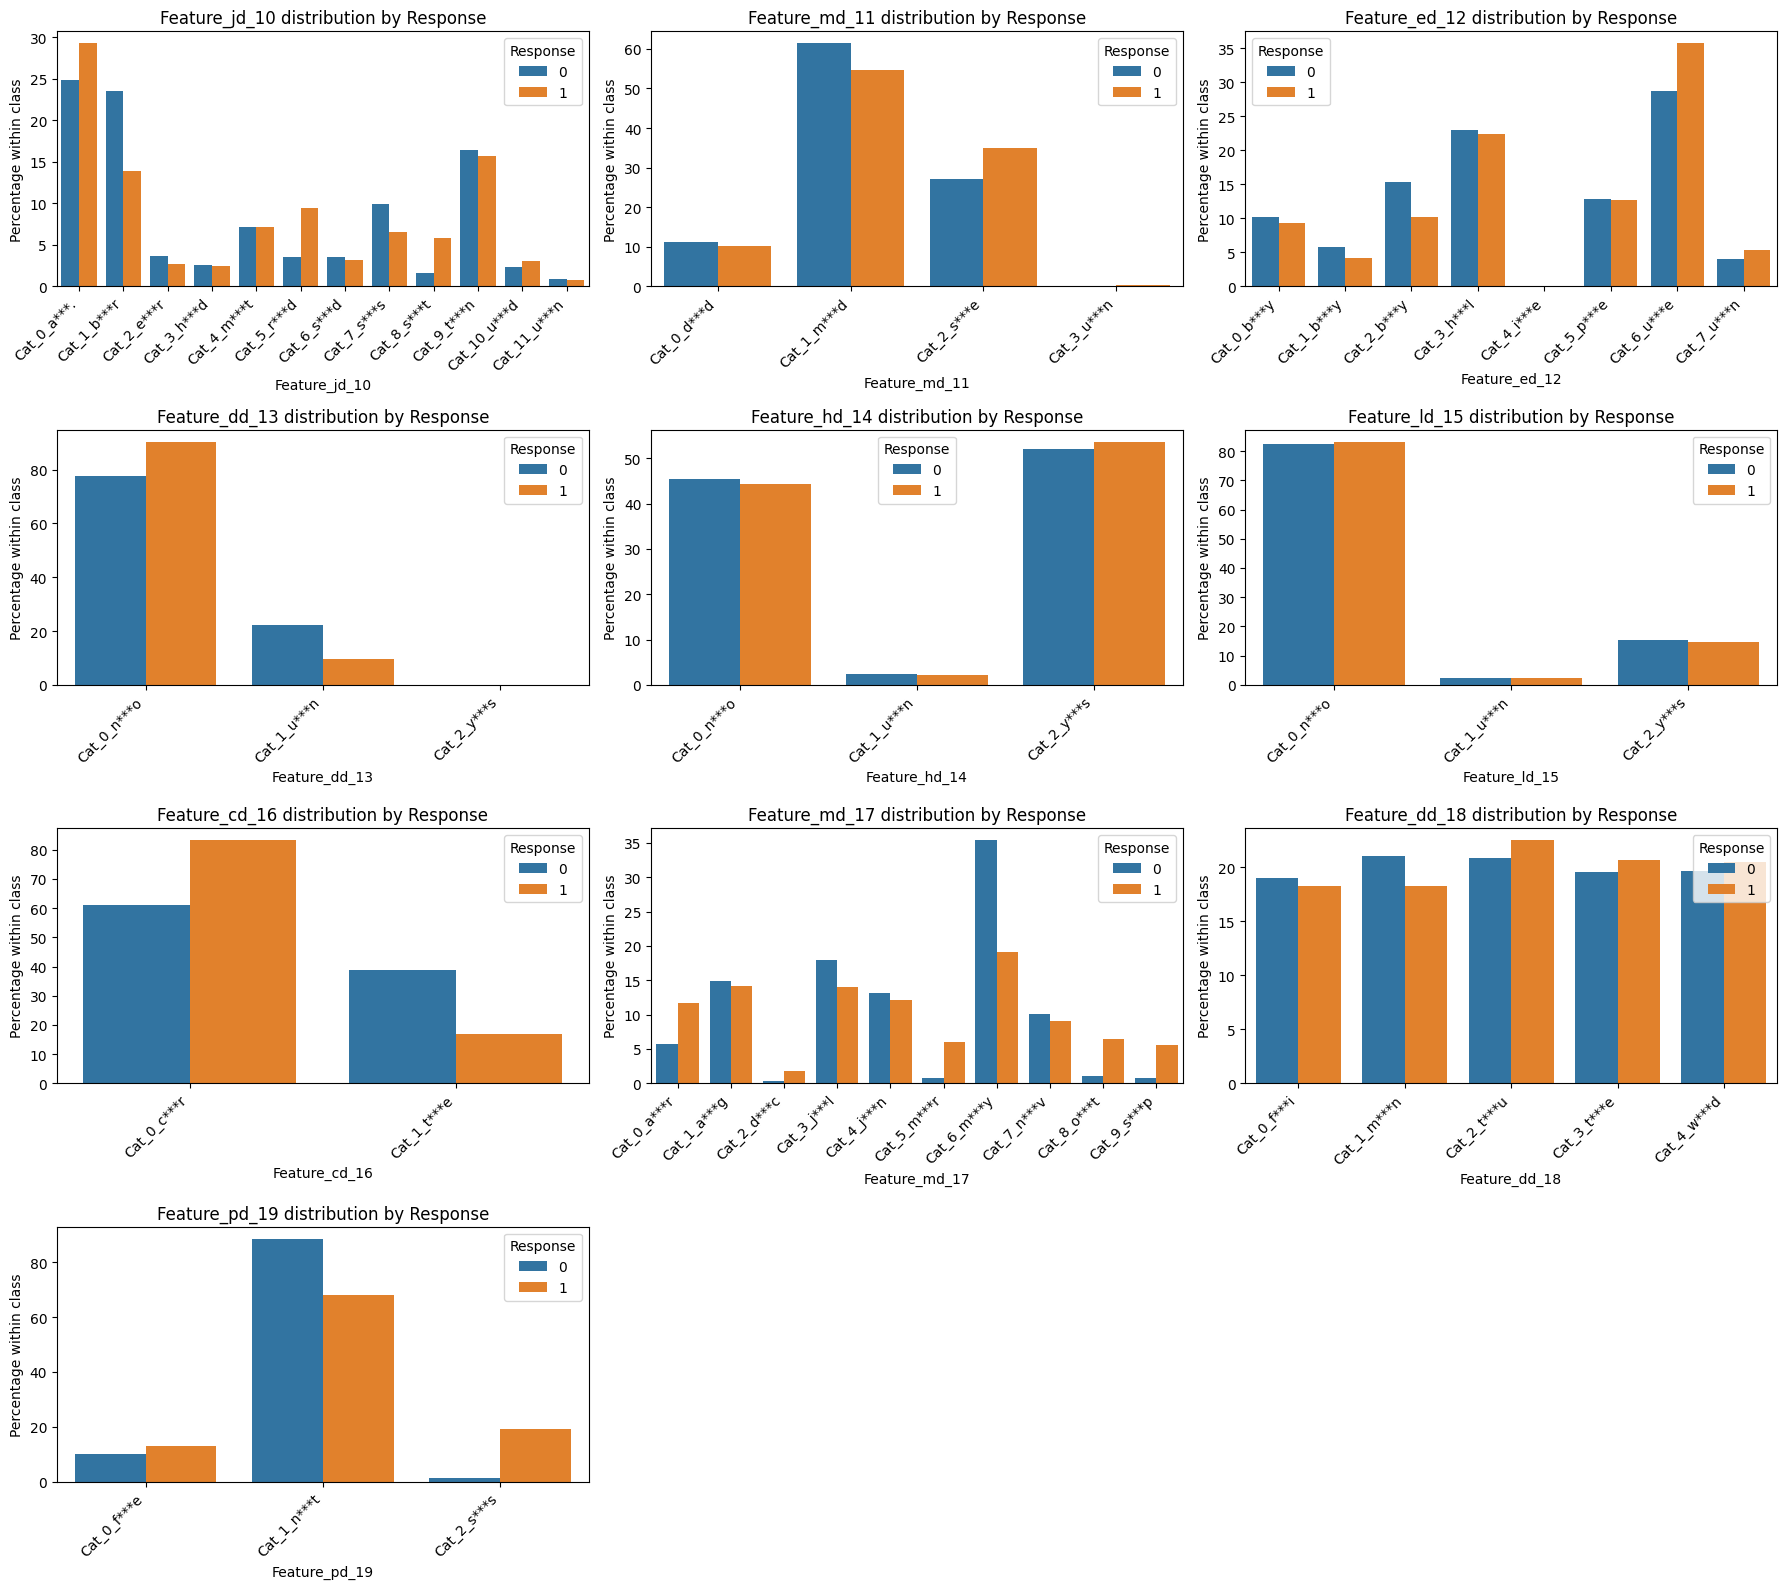

In [16]:
cat_features = df.select_dtypes(include=['object', 'category']).columns

n_cols = 3
n_rows = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(cat_features):
    prop = (
        df.groupby("Response")[col]
        .value_counts(normalize=True)
        .rename("proportion")
        .reset_index()
    )
    prop["percentage"] = prop["proportion"] * 100
    
    prop[col] = prop[col].astype(str)
    sorted_categories = sorted(prop[col].unique(), key=lambda x: int(x.split('_')[1]))
    
    sns.barplot(
        data=prop,
        x=col,
        y="percentage",
        hue="Response",
        order=sorted_categories,
        ax=axes[i]
    )
    
    axes[i].set_title(f"{col} distribution by Response")
    axes[i].set_ylabel("Percentage within class")
    axes[i].set_xlabel(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Feature Insights Summary

### Numeric Features Analysis

**Feature_dn_1 (Call Duration):** This feature appears to be a strong predictor. The distribution for customers who responded is shifted to the right, indicating that longer call durations are positively associated with a successful campaign outcome. 

**Feature_ae_0 (Age):** The distribution plots show that customers who responded are concentrated at the younger and older ends of the age spectrum, with a bimodal distribution. In contrast, those who did not respond are more centrally distributed. This suggests that the campaign was more effective for specific age groups.

**Feature_cn_2 (Number of Call Attempts):** The distribution for those who responded is concentrated at lower values (fewer call attempts). This suggests that successful campaigns generally require fewer call attempts, or that repeated calls might be a sign of a failed attempt to engage the customer.

**Feature_ps_3 (Days since last campaign):** Prior campaign are associated with stronger response rates. 

**Macro Variables:** The distributions of macro variables (Feature_ee_5, Feature_cx_6, Feature_cx_7, Feature_em_8, Feature_nd_9) show distinct patterns for responders vs. non-responders. For example, Feature_ee_5 shows a clear bimodal distribution for responders, indicating that certain economic conditions (either very low or very high employment variation rates) were more conducive to success.

### Categorical Features Analysis

**Feature_jd_10 (Employment Type):** The campaign was particularly successful with Cat_5 and Cat_8.

**Feature_dd_13 (Credit in Default):** The response rates for these features are heavily skewed. Cat_0 shows a higher response rate. 

**Feature_dd_18 (Day of the Week):** The response rates are fairly uniform across all days of the week, suggesting that the day of the week is not a strong predictor of success.

**Feature_pd_19 (Previous Campaign Outcome):** The response rate is significantly higher for customers who were successful in the previous campaign (Cat_2). This indicates that past success is a strong predictor of future success. Conversely, customers who failed to respond previously (Cat_0) are less likely to respond again.

## 3. Data Preprocessing

Perform transformation on feature_ps_3. 0 (no campaign if 999 else 1)

In [60]:
# Create the new binary feature based on the condition
df['Feature_ps_3'] = df['Feature_ps_3'].apply(lambda x: 'No Campaign' if x == 999 else 'Campaign')

# The DataFrame df_processed now has the new, simplified feature
print(df[['Feature_ps_3']].value_counts())

Feature_ps_3
No Campaign     33711
Campaign         1289
Name: count, dtype: int64


In [62]:
df.select_dtypes(include=['object', 'category']).columns

Index(['Feature_ps_3', 'Feature_jd_10', 'Feature_md_11', 'Feature_ed_12',
       'Feature_dd_13', 'Feature_hd_14', 'Feature_ld_15', 'Feature_cd_16',
       'Feature_md_17', 'Feature_dd_18', 'Feature_pd_19'],
      dtype='object')

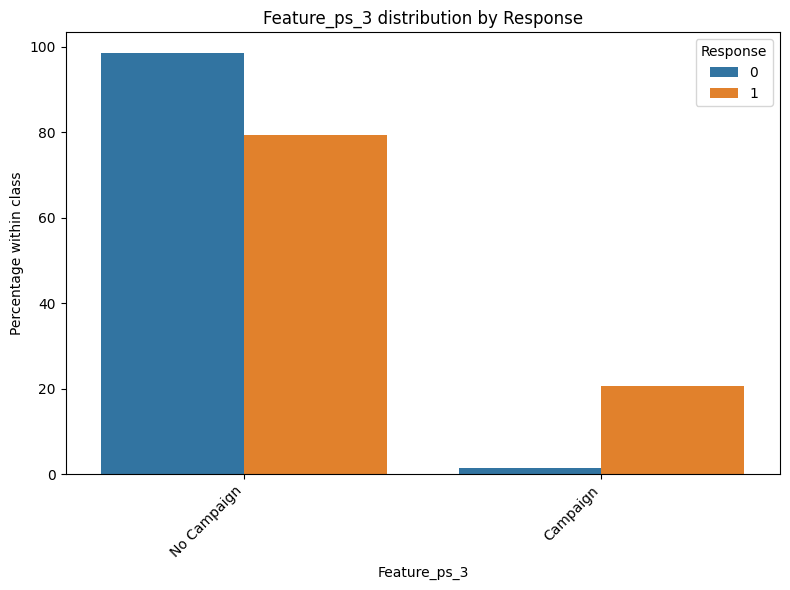

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate proportions for 'Feature_ps_3' grouped by 'Response'
prop = (
    df.groupby("Response")["Feature_ps_3"]
    .value_counts(normalize=True)
    .rename("proportion")
    .reset_index()
)
prop["percentage"] = prop["proportion"] * 100

# Convert categories to strings for plotting
prop["Feature_ps_3"] = prop["Feature_ps_3"].astype(str)

# Plotting the data
plt.figure(figsize=(8, 6))
sns.barplot(
    data=prop,
    x="Feature_ps_3",
    y="percentage",
    hue="Response",
)

plt.title("Feature_ps_3 distribution by Response")
plt.ylabel("Percentage within class")
plt.xlabel("Feature_ps_3")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot without saving
plt.show()

### 3.2. Encoding Categorical Variables
Categorical variables need to be converted into a numerical format for the model to understand them. We will use one-hot encoding for this purpose.

In [66]:
categorical_features = [col for col in df.columns if df[col].dtype == 'object']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df_encoded.head()

,Feature_ae_0,Feature_dn_1,Feature_cn_2,Feature_ps_4,Feature_ee_5,Feature_cx_6,Feature_cx_7,Feature_em_8,Feature_nd_9,Response,...,Feature_md_17_Cat_6_m***y,Feature_md_17_Cat_7_n***v,Feature_md_17_Cat_8_o***t,Feature_md_17_Cat_9_s***p,Feature_dd_18_Cat_1_m***n,Feature_dd_18_Cat_2_t***u,Feature_dd_18_Cat_3_t***e,Feature_dd_18_Cat_4_w***d,Feature_pd_19_Cat_1_n***t,Feature_pd_19_Cat_2_s***s
0,57,371,1,1,-1.80,92.89,-46.20,1.30,5099.10,0,...,True,False,False,False,True,False,False,False,False,False
1,55,285,2,0,1.10,93.99,-36.40,4.86,5191.00,0,...,True,False,False,False,False,True,False,False,True,False
2,33,52,1,1,-1.80,92.89,-46.20,1.31,5099.10,0,...,True,False,False,False,False,False,False,False,False,False
3,36,355,4,0,1.40,94.47,-41.80,4.97,5228.10,0,...,False,False,False,False,False,False,False,False,True,False
4,27,189,2,0,1.40,93.92,-42.70,4.96,5228.10,0,...,False,False,False,False,False,False,False,False,True,False


### 3.3. Feature Scaling
We will scale the numerical features to have a mean of 0 and a standard deviation of 1. This is important for models like Logistic Regression that are sensitive to the scale of the features.

In [18]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
/usr/share/python-wheels/urllib3-1.25.8-py2.py3-none-any.whl/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pypi.ngc.nvidia.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
Requirement already up-to-date: scikit-learn in /raid/students/alister/.local/lib/python3.8/site-packages (1.3.2)


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('Response')
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])
df_encoded.head()

,Feature_ae_0,Feature_dn_1,Feature_cn_2,Feature_ps_3,Feature_ps_4,Feature_ee_5,Feature_cx_6,Feature_cx_7,Feature_em_8,Feature_nd_9,...,Feature_md_17_Cat_6_m***y,Feature_md_17_Cat_7_n***v,Feature_md_17_Cat_8_o***t,Feature_md_17_Cat_9_s***p,Feature_dd_18_Cat_1_m***n,Feature_dd_18_Cat_2_t***u,Feature_dd_18_Cat_3_t***e,Feature_dd_18_Cat_4_w***d,Feature_pd_19_Cat_1_n***t,Feature_pd_19_Cat_2_s***s
0,1.627296,0.437620,-0.564504,0.195541,1.669270,-1.197107,-1.180196,-1.229660,-1.338069,-0.941359,...,True,False,False,False,True,False,False,False,False,False
1,1.435504,0.105040,-0.203152,0.195541,-0.350939,0.648759,0.722841,0.891606,0.714885,0.332006,...,True,False,False,False,False,True,False,False,True,False
2,-0.674202,-0.796021,-0.564504,0.195541,1.669270,-1.197107,-1.180196,-1.229660,-1.329998,-0.941359,...,True,False,False,False,False,False,False,False,False,False
3,-0.386515,0.375745,0.519552,0.195541,-0.350939,0.839711,1.536947,-0.277255,0.776572,0.846063,...,False,False,False,False,False,False,False,False,True,False
4,-1.249576,-0.266213,-0.203152,0.195541,-0.350939,0.839711,0.591478,-0.472065,0.774266,0.846063,...,False,False,False,False,False,False,False,False,True,False


## 4. Model Training and Evaluation

### 4.1. Train-Test Split

For simplicity, I won't be making use of validation dataset and instead I'll use autoML which will already find the best hyperparameters by making use of the training dataset. 

In [68]:
from sklearn.model_selection import train_test_split

# Features and target
X = df_encoded.drop('Response', axis=1)
y = df_encoded['Response']

# Train (70%) / Test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 28000
Test size: 7000


In [21]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
/usr/share/python-wheels/urllib3-1.25.8-py2.py3-none-any.whl/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pypi.ngc.nvidia.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
     |████████████████████████████████| 65 kB 23.2 MB/s eta 0:00:01
ERROR: jupyterlab-server 2.27.3 has requirement jsonschema>=4.18.0, but you'll have jsonschema 3.2.0 which is incompatible.
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully uninstalled packaging-25.0


In [22]:
!pip install ipywidgets jupyter

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
/usr/share/python-wheels/urllib3-1.25.8-py2.py3-none-any.whl/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pypi.ngc.nvidia.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
     |████████████████████████████████| 88 kB 23.3 MB/s eta 0:00:01
/usr/share/python-wheels/urllib3-1.25.8-py2.py3-none-any.whl/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pypi.ngc.nvidia.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
/usr/share/python-wheels/urllib3-1.25.8-py2.py3-none-any.whl/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pypi.ngc.nvidia.com'. Adding certificate verification is

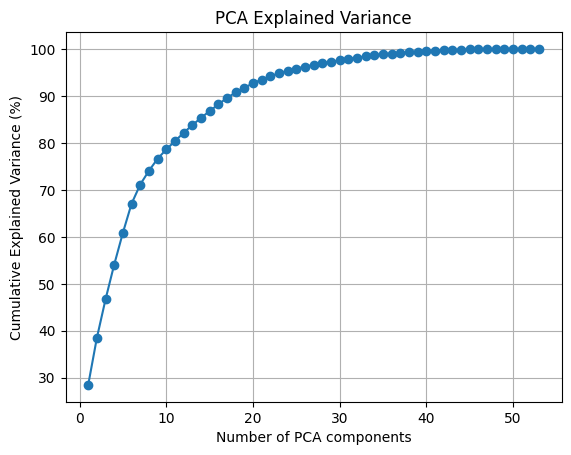

1 components explain 28.47% of the variance
2 components explain 38.48% of the variance
3 components explain 46.70% of the variance
4 components explain 54.10% of the variance
5 components explain 60.86% of the variance
6 components explain 67.04% of the variance
7 components explain 71.13% of the variance
8 components explain 74.05% of the variance
9 components explain 76.62% of the variance
10 components explain 78.59% of the variance
11 components explain 80.37% of the variance
12 components explain 82.13% of the variance
13 components explain 83.77% of the variance
14 components explain 85.30% of the variance
15 components explain 86.77% of the variance
16 components explain 88.18% of the variance
17 components explain 89.56% of the variance
18 components explain 90.73% of the variance
19 components explain 91.75% of the variance
20 components explain 92.66% of the variance
21 components explain 93.49% of the variance
22 components explain 94.20% of the variance
23 components expla

In [30]:
## With PCA

from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA().fit(X_train)

explained_var = np.cumsum(pca.explained_variance_ratio_) * 100

plt.plot(range(1, len(explained_var) + 1), explained_var, marker="o")
plt.xlabel("Number of PCA components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.show()

for i, var in enumerate(explained_var, start=1):
    print(f"{i} components explain {var:.2f}% of the variance")

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Fit PCA
pca = PCA().fit(X_train)

# Cumulative explained variance
explained_var = np.cumsum(pca.explained_variance_ratio_)

# Find components for 90% and 95%
n_components_90 = np.argmax(explained_var >= 0.90) + 1
n_components_95 = np.argmax(explained_var >= 0.95) + 1

print(f"Number of components for 90% variance: {n_components_90}")
print(f"Number of components for 95% variance: {n_components_95}")

Number of components for 90% variance: 18
Number of components for 95% variance: 24


In [32]:
# --- 90% variance ---
pca_90 = PCA(n_components=n_components_90, random_state=42)
X_train_90 = pca_90.fit_transform(X_train)
X_test_90 = pca_90.transform(X_test)

# --- 95% variance ---
pca_95 = PCA(n_components=n_components_95, random_state=42)
X_train_95 = pca_95.fit_transform(X_train)
X_test_95 = pca_95.transform(X_test)

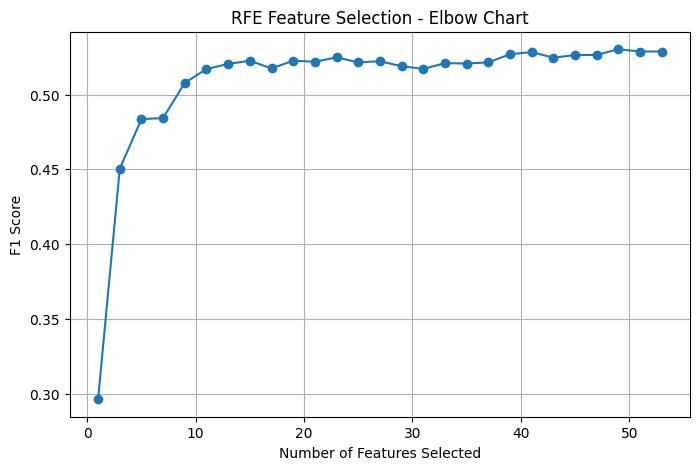

Best number of features: 49, Best F1 score: 0.5303


In [39]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import numpy as np

log_reg = LogisticRegression(random_state=0, max_iter=1000)

# Try different numbers of features
scores = []
n_features_range = range(1, X_train.shape[1] + 1, 2)  # step=2 for speed, can adjust

for n in n_features_range:
    rfe = RFE(estimator=log_reg, n_features_to_select=n)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)
    
    # Fit model
    log_reg.fit(X_train_rfe, y_train)
    y_pred = log_reg.predict(X_test_rfe)
    
    # Evaluate (use F1-score, can change to AUC)
    score = f1_score(y_test, y_pred)
    scores.append(score)

# Plot elbow chart
plt.figure(figsize=(8, 5))
plt.plot(n_features_range, scores, marker='o')
plt.xlabel("Number of Features Selected")
plt.ylabel("F1 Score")
plt.title("RFE Feature Selection - Elbow Chart")
plt.grid(True)
plt.show()

# Best number of features
best_n = n_features_range[np.argmax(scores)]
print(f"Best number of features: {best_n}, Best F1 score: {max(scores):.4f}")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

# Define XGBoost model
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=0
)

scores = []
n_features_range = range(1, 20)  # step=2 for speed

for n in n_features_range:
    rfe = RFE(estimator=xgb, n_features_to_select=n, step=1)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)
    
    # Fit model
    xgb.fit(X_train_rfe, y_train)
    y_pred = xgb.predict(X_test_rfe)
    
    # Evaluate with F1-score (you can swap with roc_auc_score)
    score = f1_score(y_test, y_pred)
    scores.append(score)

# Plot elbow chart
plt.figure(figsize=(8, 5))
plt.plot(n_features_range, scores, marker='o')
plt.xlabel("Number of Features Selected")
plt.ylabel("F1 Score")
plt.title("RFE Feature Selection with XGBoost - Elbow Chart")
plt.grid(True)
plt.show()

# Best number of features
best_n = n_features_range[np.argmax(scores)]
print(f"Best number of features: {best_n}, Best F1 score: {max(scores):.4f}")


KeyboardInterrupt: 

In [69]:
from flaml import AutoML

# Initialize an AutoML instance
automl = AutoML()

# Specify automl goal and constraint
automl_settings = {
    "time_budget": 100,
    "metric": 'roc_auc',
    "task": 'classification',
    "log_file_name": "credit_default.log",
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 09-24 01:25:36] {1728} INFO - task = classification
[flaml.automl.logger: 09-24 01:25:36] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 09-24 01:25:36] {1838} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 09-24 01:25:36] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd', 'catboost', 'lrl1']
[flaml.automl.logger: 09-24 01:25:36] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 09-24 01:25:37] {2393} INFO - Estimated sufficient time budget=9590s. Estimated necessary time budget=236s.
[flaml.automl.logger: 09-24 01:25:37] {2442} INFO -  at 1.2s,	estimator lgbm's best error=0.0952,	best estimator lgbm's best error=0.0952
[flaml.automl.logger: 09-24 01:25:37] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 09-24 01:25:38] {2442} INFO -  at 2.4s,	estimator lgbm's best error=0.0952,	best estimator lgbm's best error=0.0952
[flaml.aut

In [71]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report
import pandas as pd

# Models with AutoML hyperparameters
models = {
    "Logistic Regression": LogisticRegression(
        max_iter=1000,
        solver="lbfgs",
        random_state=42
    ),

    # Best LightGBM (record_id=5, validation_loss=0.06156)
    "LightGBM": LGBMClassifier(
        n_estimators=165,
        num_leaves=19,
        min_child_samples=3,
        learning_rate=0.17402065726724145,
        max_bin=2**8,   # log_max_bin=8 → max_bin=256
        colsample_bytree=0.6649148062238498,
        reg_alpha=0.0009765625,
        reg_lambda=0.006761362450996487,
        random_state=42
    ),

    # Best XGBoost (record_id=6, validation_loss=0.06009)
    "XGBoost": XGBClassifier(
        n_estimators=11,
        max_leaves=23,
        min_child_weight=1.198219708065302,
        learning_rate=0.5917585189324418,
        subsample=0.9986444603462741,
        colsample_bylevel=1.0,
        colsample_bytree=0.9468117873770695,
        reg_alpha=0.026629132162083402,
        reg_lambda=0.4001243226017511,
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42
    )
}

results = {}

# Train & evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    f1 = f1_score(y_test, y_pred)

    results[name] = {
        "Accuracy": acc,
        "ROC-AUC": auc,
        "F1-Score": f1,
        "Report": classification_report(y_test, y_pred, output_dict=True)
    }

# Summary table
summary = pd.DataFrame({
    k: {"Accuracy": v["Accuracy"], "ROC-AUC": v["ROC-AUC"], "F1-Score": v["F1-Score"]}
    for k, v in results.items()
}).T

print("\n Model Performance Summary:\n")
print(summary)



 Model Performance Summary:

                     Accuracy  ROC-AUC  F1-Score
Logistic Regression      0.91     0.94      0.51
LightGBM                 0.92     0.95      0.61
XGBoost                  0.92     0.95      0.60


In [80]:
from xgboost import XGBClassifier
from flaml import AutoML
import pandas as pd

# 1. Train XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb.fit(X_train, y_train)

# 2. Get feature importance (by gain)
importance = xgb.get_booster().get_score(importance_type='gain')

# Handle feature names: if they're like 'f0', 'f1', map to X_train.columns
feature_names = list(X_train.columns)
mapped_features = []
for f in importance.keys():
    if f.startswith("f") and f[1:].isdigit():   # numeric index
        mapped_features.append(feature_names[int(f[1:])])
    else:  # already column name
        mapped_features.append(f)

# Convert to DataFrame
importance_df = pd.DataFrame({
    "Feature": mapped_features,
    "Gain": list(importance.values())
}).sort_values(by="Gain", ascending=False)

# 3. Extract Top 10 features
top10_features = importance_df.head(10)["Feature"].tolist()
print("Top 10 features:", top10_features)

# 4. Filter training and test sets
X_train_top = X_train[top10_features]
X_test_top = X_test[top10_features]

# 5. Run AutoML with top features
automl = AutoML()
automl_settings = {
    "time_budget": 100,
    "metric": 'roc_auc',
    "task": 'classification',
    "log_file_name": "credit_default_top10.log",
}

automl.fit(X_train=X_train_top, y_train=y_train, **automl_settings)

# 6. Evaluate on test set
y_pred = automl.predict(X_test_top)
y_proba = automl.predict_proba(X_test_top)[:, 1]

from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("F1-Score:", f1_score(y_test, y_pred))
print("Best model:", automl.best_estimator)
print("Best hyperparameters:", automl.best_config)

Top 10 features: ['Feature_nd_9', 'Feature_md_17_Cat_8_o***t', 'Feature_dn_1', 'Feature_ps_3_No Campaign', 'Feature_pd_19_Cat_2_s***s', 'Feature_cx_7', 'Feature_ee_5', 'Feature_md_17_Cat_6_m***y', 'Feature_cd_16_Cat_1_t***e', 'Feature_cx_6']
[flaml.automl.logger: 09-24 01:46:21] {1728} INFO - task = classification
[flaml.automl.logger: 09-24 01:46:21] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 09-24 01:46:21] {1838} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 09-24 01:46:21] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd', 'catboost', 'lrl1']
[flaml.automl.logger: 09-24 01:46:21] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 09-24 01:46:22] {2393} INFO - Estimated sufficient time budget=13653s. Estimated necessary time budget=337s.
[flaml.automl.logger: 09-24 01:46:22] {2442} INFO -  at 1.4s,	estimator lgbm's best error=0.0959,	best estimator lgbm's best erro

In [83]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report
import pandas as pd

# Models with AutoML hyperparameters
models = {
    "Logistic Regression": LogisticRegression(
        max_iter=1000,
        solver="lbfgs",
        random_state=42
    ),

    # Best CatBoost (record_id=6)
    "CatBoost": CatBoostClassifier(
        early_stopping_rounds=10,
        learning_rate=0.1,
        n_estimators=8192,
        verbose=0,
        random_state=42
    ),

    # Best LGBM (record_id=5)
    "LightGBM": LGBMClassifier(
        n_estimators=165,
        num_leaves=19,
        min_child_samples=9,
        learning_rate=0.024282186997032957,
        colsample_bytree=0.47342795260738935,
        reg_alpha=0.0009765625,
        reg_lambda=0.003241489691566038,
        random_state=42
    ),

    # Example tuned XGBoost (not from your logs, just baseline params)
    "XGBoost": XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        use_label_encoder=False,
        eval_metric="logloss"
    ),
}

results = {}

# Train & evaluate
for name, model in models.items():
    model.fit(X_train_top, y_train)
    y_pred = model.predict(X_test_top)
    y_proba = model.predict_proba(X_test_top)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    f1 = f1_score(y_test, y_pred)

    results[name] = {
        "Accuracy": acc,
        "ROC-AUC": auc,
        "F1-Score": f1,
        "Report": classification_report(y_test, y_pred, output_dict=True)
    }

# Summary table
summary = pd.DataFrame({
    k: {"Accuracy": v["Accuracy"], "ROC-AUC": v["ROC-AUC"], "F1-Score": v["F1-Score"]}
    for k, v in results.items()
}).T

print("\n Model Performance Summary:\n")
print(summary)


 Model Performance Summary:

                     Accuracy  ROC-AUC  F1-Score
Logistic Regression      0.91     0.94      0.51
CatBoost                 0.91     0.92      0.55
LightGBM                 0.91     0.95      0.52
XGBoost                  0.92     0.95      0.59


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report
import pandas as pd

# Final tuned XGBoost model
final_xgb = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

# Fit only on top 10 features
final_xgb.fit(X_train_top, y_train)

# Predictions
y_pred = final_xgb.predict(X_test_top)
y_proba = final_xgb.predict_proba(X_test_top)[:, 1]

# Evaluation metrics
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
f1 = f1_score(y_test, y_pred)

print("\nFinal XGBoost Performance (Top 10 Features):\n")
print(f"Accuracy  : {acc:.4f}")
print(f"ROC-AUC   : {auc:.4f}")
print(f"F1-Score  : {f1:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Feature importance (for top 10 features used)
feature_importance = pd.DataFrame({
    "Feature": X_train_top.columns,
    "Importance": final_xgb.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance (Top 10 Features Used):\n")
print(feature_importance)


Final XGBoost Performance (Top 10 Features):

Accuracy  : 0.9170
ROC-AUC   : 0.9461
F1-Score  : 0.5940

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6214
           1       0.66      0.54      0.59       786

    accuracy                           0.92      7000
   macro avg       0.80      0.75      0.77      7000
weighted avg       0.91      0.92      0.91      7000


Feature Importance (Top 10 Features Used):

                     Feature  Importance
0               Feature_nd_9        0.42
2               Feature_dn_1        0.14
6               Feature_ee_5        0.10
7  Feature_md_17_Cat_6_m***y        0.09
1  Feature_md_17_Cat_8_o***t        0.06
3   Feature_ps_3_No Campaign        0.05
5               Feature_cx_7        0.05
4  Feature_pd_19_Cat_2_s***s        0.04
9               Feature_cx_6        0.03
8  Feature_cd_16_Cat_1_t***e        0.02


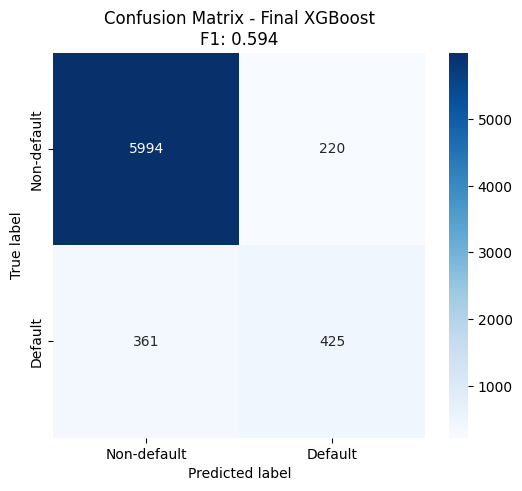

In [86]:
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data (top 10 features)
y_pred = final_xgb.predict(X_test_top)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=['Non-default', 'Default'],
            yticklabels=['Non-default', 'Default'])
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title(f"Confusion Matrix - Final XGBoost\nF1: {f1_score(y_test, y_pred):.3f}")
plt.show()

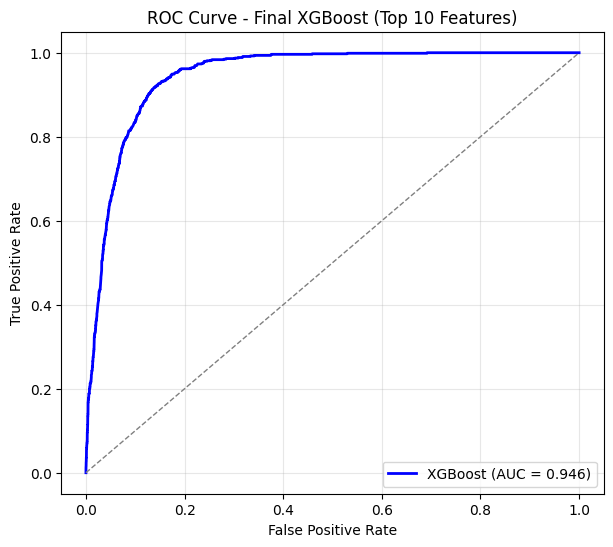

In [87]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Predicted probabilities for ROC
y_proba = final_xgb.predict_proba(X_test_top)[:, 1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"XGBoost (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=1)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Final XGBoost (Top 10 Features)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


In [74]:
from lightgbm import LGBMClassifier, plot_importance
import matplotlib.pyplot as plt
import pandas as pd

# Train LGBM model
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)

# Get importance values
importance_split = lgbm.feature_importances_   # Default = "split"
importance_gain = lgbm.booster_.feature_importance(importance_type="gain")

# Put into DataFrame
importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Split Importance": importance_split,
    "Gain Importance": importance_gain
}).sort_values(by="Gain Importance", ascending=False)

print(importance_df.head(10))  # Top 10 features

                      Feature  Split Importance  Gain Importance
1                Feature_dn_1               733         29494.12
8                Feature_nd_9                42         13652.91
7                Feature_em_8               498          6001.76
6                Feature_cx_7               103          2703.98
4                Feature_ee_5                94          2415.64
0                Feature_ae_0               397          2147.84
5                Feature_cx_6               108          1065.56
9    Feature_ps_3_No Campaign                32           853.34
45  Feature_md_17_Cat_8_o***t                26           828.03
2                Feature_cn_2               151           664.18


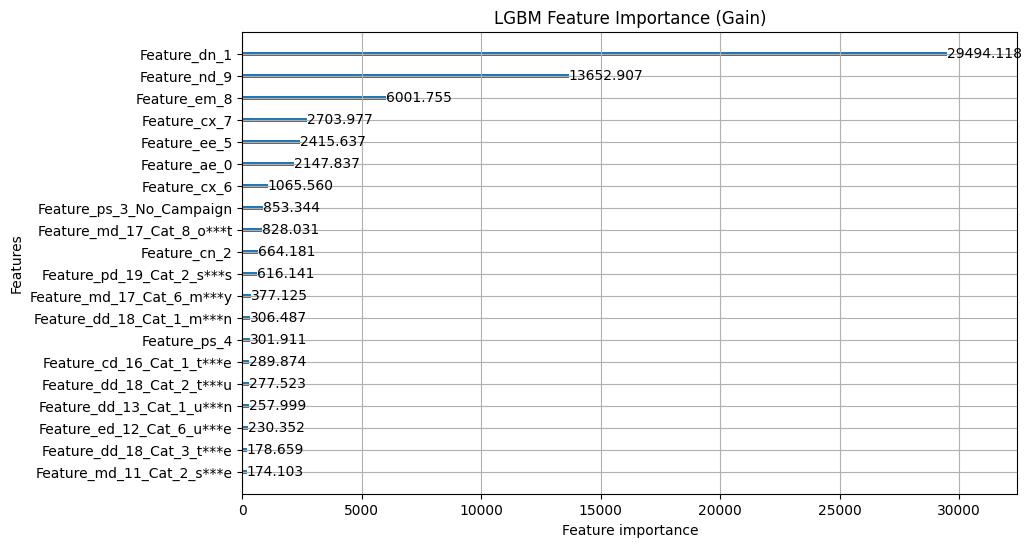

In [78]:
# Plot by gain
plot_importance(lgbm, importance_type="gain", max_num_features=20, figsize=(10,6))
plt.title("LGBM Feature Importance (Gain)")
plt.show()

In [47]:
from flaml import AutoML

# Initialize an AutoML instance
automl = AutoML()

# Specify automl goal and constraint
automl_settings = {
    "time_budget": 100,
    "metric": 'roc_auc',
    "task": 'classification',
    "log_file_name": "credit_default.log",
}

# Train with labeled input data
automl.fit(X_train=X_train_90, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 09-24 00:37:02] {1728} INFO - task = classification
[flaml.automl.logger: 09-24 00:37:02] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 09-24 00:37:02] {1838} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 09-24 00:37:02] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd', 'catboost', 'lrl1']
[flaml.automl.logger: 09-24 00:37:02] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 09-24 00:37:04] {2393} INFO - Estimated sufficient time budget=11048s. Estimated necessary time budget=272s.
[flaml.automl.logger: 09-24 00:37:04] {2442} INFO -  at 1.1s,	estimator lgbm's best error=0.1160,	best estimator lgbm's best error=0.1160
[flaml.automl.logger: 09-24 00:37:04] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 09-24 00:37:05] {2442} INFO -  at 2.2s,	estimator lgbm's best error=0.1160,	best estimator lgbm's best error=0.1160
[flaml.au

✅ Saved LightGBM model
✅ Saved SGD model
✅ Saved CatBoost model


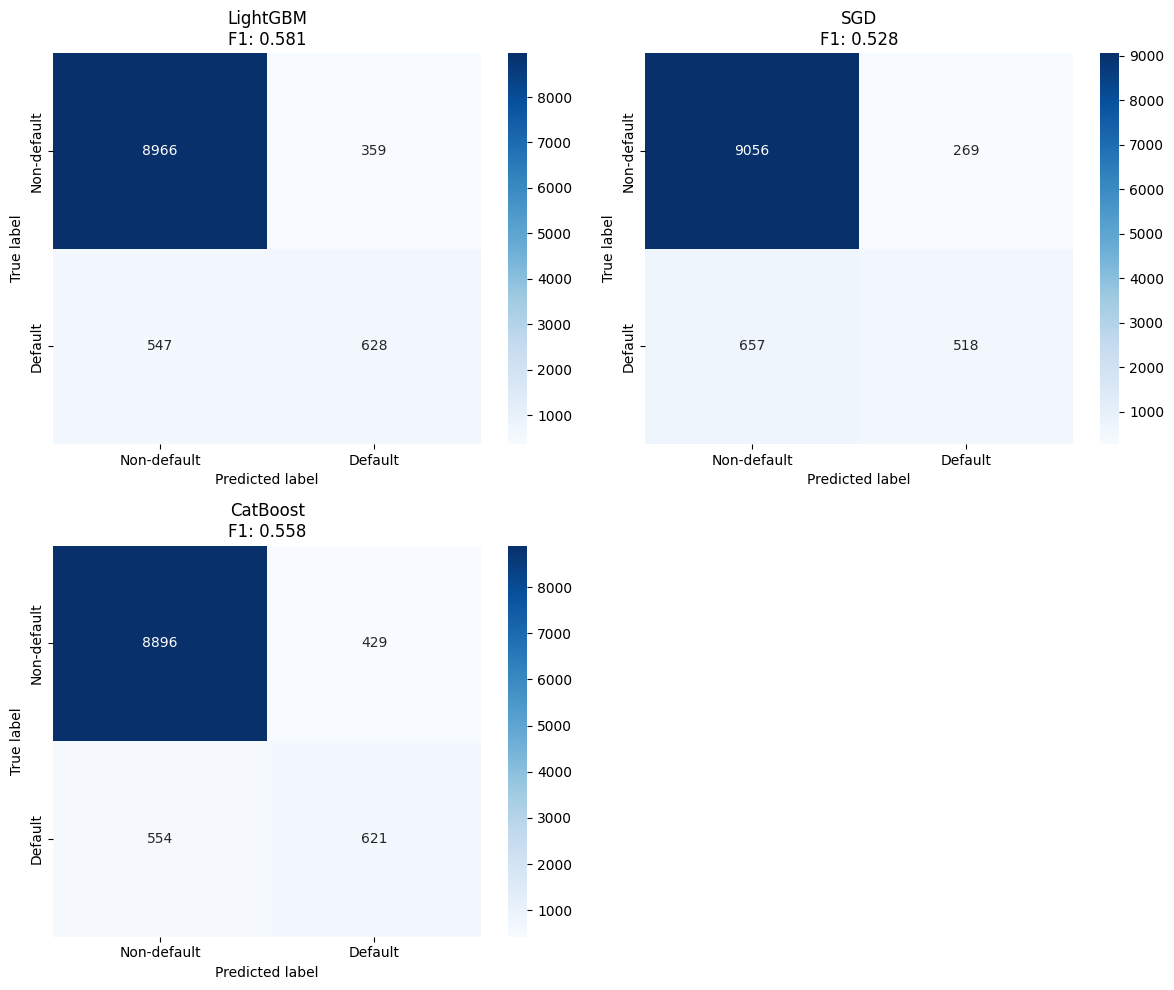

In [ ]:
import joblib
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier

# AutoML best hyperparameters
lgbm_params = {
    "n_estimators": 131,
    "num_leaves": 19,
    "min_child_samples": 6,
    "learning_rate": 0.16645809713264254,
    "colsample_bytree": 0.763007791741338,
    "reg_alpha": 0.0009765625,
    "reg_lambda": 0.10626868868028042
}

sgd_params = {
    "penalty": "l1",
    "alpha": 0.0004822000992733533,
    "l1_ratio": 0.008705748896672437,
    "epsilon": 0.1,
    "learning_rate": "constant",
    "eta0": 0.007328089893072002,
    "power_t": 0.47436097801285154,
    "average": False,
    "loss": "log_loss"
}

catboost_params = {
    "early_stopping_rounds": 10,
    "learning_rate": 0.1,
    "n_estimators": 8192,
    "verbose": 0
}

# Initialize models
models = {
    "LightGBM": LGBMClassifier(**lgbm_params, random_state=0),
    "SGD": SGDClassifier(**sgd_params, random_state=0),
    "CatBoost": CatBoostClassifier(**catboost_params, random_state=0)
}

# Train and save models
for name, model in models.items():
    model.fit(X_train, y_train)
    joblib.dump(model, f"{name}_model.pkl")
    print(f"✅ Saved {name} model")

# Later: load models for evaluation
loaded_models = {}
for name in models.keys():
    loaded_models[name] = joblib.load(f"{name}_model.pkl")

# Example: evaluate LightGBM
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

rows, cols = 2, 2
fig = plt.figure(figsize=(12, 10))

for idx, (name, model) in enumerate(loaded_models.items(), 1):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.subplot(rows, cols, idx)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
                xticklabels=['Non-default', 'Default'],
                yticklabels=['Non-default', 'Default'])
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title(f"{name}\nF1: {f1_score(y_test, y_pred):.3f}")

plt.tight_layout()
plt.show()

The Random Forest model performs better than the Logistic Regression model, so we will choose it as our final model.

## 5. Answering the Case Study Questions

### Feature Importance

In [ ]:
importances = rf_clf.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances}).sort_values(by='importance', ascending=False)
print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
                       feature  importance
1                 Feature_dn_1        0.30
8                 Feature_em_8        0.09
0                 Feature_ae_0        0.08
9                 Feature_nd_9        0.05
2                 Feature_cn_2        0.04
3                 Feature_ps_3        0.03
7                 Feature_cx_7        0.03
5                 Feature_ee_5        0.03
6                 Feature_cx_6        0.02
52   Feature_pd_19_Cat_2_s***s        0.02
34   Feature_hd_14_Cat_2_y***s        0.02
4                 Feature_ps_4        0.01
21   Feature_md_11_Cat_1_m***d        0.01
36   Feature_ld_15_Cat_2_y***s        0.01
29   Feature_ed_12_Cat_6_u***e        0.01
47   Feature_dd_18_Cat_1_m***n        0.01
22   Feature_md_11_Cat_2_s***e        0.01
50   Feature_dd_18_Cat_4_w***d        0.01
48   Feature_dd_18_Cat_2_t***u        0.01
49   Feature_dd_18_Cat_3_t***e        0.01
26   Feature_ed_12_Cat_3_h***l        0.01
20   Feature_jd_10_Cat_9_t***n   

In [ ]:
important_features = [
    "Feature_dn_1",
    "Feature_em_8",
    "Feature_ae_0",
    "Feature_nd_9",
    "Feature_cn_2",
    "Feature_ps_3",
    "Feature_cx_7",
    "Feature_ee_5",
    "Feature_cx_6"
]

X = df[important_features]

In [ ]:
from sklearn.model_selection import train_test_split

X = df[important_features]
y = df["Response"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

print("Train score:", model.score(X_train, y_train))
print("Test score:", model.score(X_test, y_test))

Train score: 0.9999642857142857
Test score: 0.9117142857142857


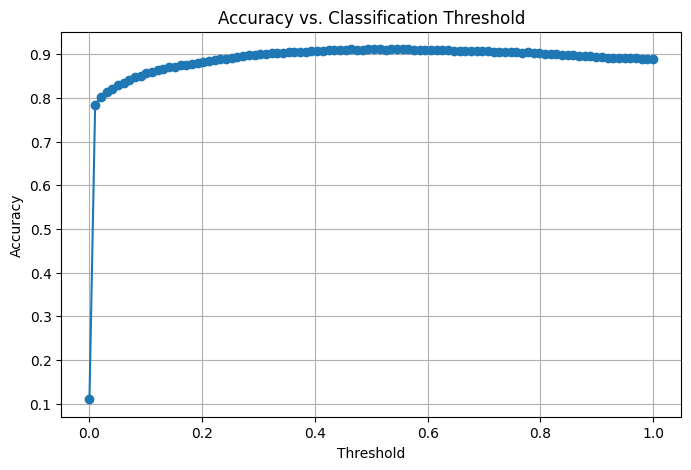

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Probabilities for the positive class
y_proba_pos = model.predict_proba(X_test)[:, 1]

thresholds = np.linspace(0, 1, 100)  # thresholds from 0 to 1
accuracies = []

for t in thresholds:
    y_pred = (y_proba_pos >= t).astype(int)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot
plt.figure(figsize=(8,5))
plt.plot(thresholds, accuracies, marker='o')
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Classification Threshold")
plt.grid(True)
plt.show()


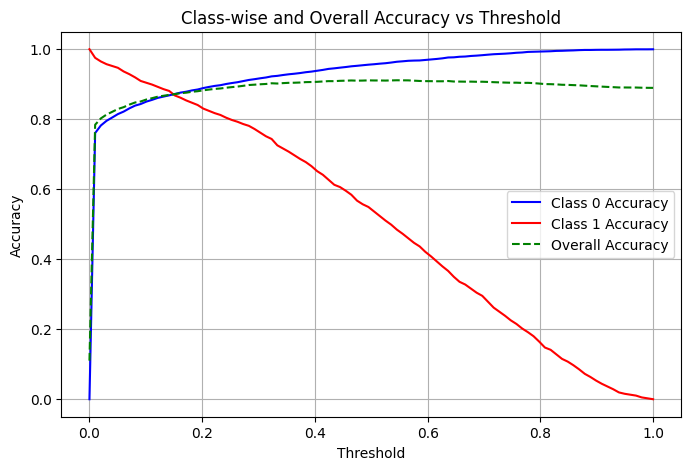

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

# Probabilities for the positive class
y_proba_pos = model.predict_proba(X_test)[:, 1]

thresholds = np.linspace(0, 1, 100)
class0_acc, class1_acc, avg_acc = [], [], []

for t in thresholds:
    y_pred = (y_proba_pos >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    acc0 = tn / (tn + fp) if (tn + fp) > 0 else 0  # accuracy for class 0
    acc1 = tp / (tp + fn) if (tp + fn) > 0 else 0  # accuracy for class 1
    overall = accuracy_score(y_test, y_pred)       # average (global) accuracy

    class0_acc.append(acc0)
    class1_acc.append(acc1)
    avg_acc.append(overall)

# Plot
plt.figure(figsize=(8,5))
plt.plot(thresholds, class0_acc, label="Class 0 Accuracy", color="blue")
plt.plot(thresholds, class1_acc, label="Class 1 Accuracy", color="red")
plt.plot(thresholds, avg_acc, label="Overall Accuracy", color="green", linestyle="--")
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.title("Class-wise and Overall Accuracy vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Features and target
X = df_encoded.drop('Response', axis=1)
y = df_encoded['Response']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

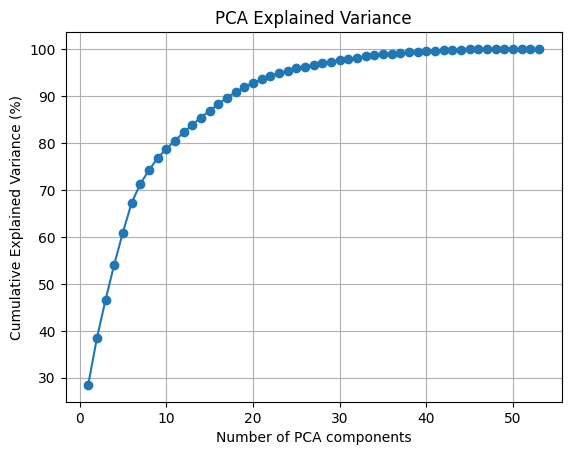

1 components explain 28.48% of the variance
2 components explain 38.41% of the variance
3 components explain 46.57% of the variance
4 components explain 54.10% of the variance
5 components explain 60.92% of the variance
6 components explain 67.19% of the variance
7 components explain 71.25% of the variance
8 components explain 74.17% of the variance
9 components explain 76.74% of the variance
10 components explain 78.70% of the variance
11 components explain 80.47% of the variance
12 components explain 82.23% of the variance
13 components explain 83.86% of the variance
14 components explain 85.37% of the variance
15 components explain 86.82% of the variance
16 components explain 88.23% of the variance
17 components explain 89.62% of the variance
18 components explain 90.79% of the variance
19 components explain 91.81% of the variance
20 components explain 92.72% of the variance
21 components explain 93.54% of the variance
22 components explain 94.25% of the variance
23 components expla

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Fit PCA on training data (or full X if you prefer)
pca = PCA().fit(X_train)

# Explained variance ratio (in %)
explained_var = np.cumsum(pca.explained_variance_ratio_) * 100

# Plot cumulative variance
plt.plot(range(1, len(explained_var) + 1), explained_var, marker="o")
plt.xlabel("Number of PCA components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.show()

# Print top components
for i, var in enumerate(explained_var, start=1):
    print(f"{i} components explain {var:.2f}% of the variance")

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Fit PCA
pca = PCA().fit(X_train)

# Cumulative explained variance
explained_var = np.cumsum(pca.explained_variance_ratio_)

# Find components for 90% and 95%
n_components_90 = np.argmax(explained_var >= 0.90) + 1
n_components_95 = np.argmax(explained_var >= 0.95) + 1

print(f"Number of components for 90% variance: {n_components_90}")
print(f"Number of components for 95% variance: {n_components_95}")


Number of components for 90% variance: 18
Number of components for 95% variance: 24


In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# --- Baseline (all features) ---
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_full = accuracy_score(y_test, y_pred)

# --- PCA fit ---
pca = PCA().fit(X_train)
explained_var = np.cumsum(pca.explained_variance_ratio_)

# Components needed
n_components_90 = np.argmax(explained_var >= 0.90) + 1
n_components_95 = np.argmax(explained_var >= 0.95) + 1

# --- 90% variance ---
pca_90 = PCA(n_components=n_components_90, random_state=42)
X_train_90 = pca_90.fit_transform(X_train)
X_test_90 = pca_90.transform(X_test)

model.fit(X_train_90, y_train)
y_pred_90 = model.predict(X_test_90)
acc_90 = accuracy_score(y_test, y_pred_90)

# --- 95% variance ---
pca_95 = PCA(n_components=n_components_95, random_state=42)
X_train_95 = pca_95.fit_transform(X_train)
X_test_95 = pca_95.transform(X_test)

model.fit(X_train_95, y_train)
y_pred_95 = model.predict(X_test_95)
acc_95 = accuracy_score(y_test, y_pred_95)

# --- Results ---
print("Baseline (all features):", round(acc_full, 4))
print(f"PCA ({n_components_90} comps, 90% var):", round(acc_90, 4))
print(f"PCA ({n_components_95} comps, 95% var):", round(acc_95, 4))


Baseline (all features): 0.908
PCA (18 comps, 90% var): 0.9091
PCA (24 comps, 95% var): 0.9079


In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
/usr/share/python-wheels/urllib3-1.25.8-py2.py3-none-any.whl/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pypi.ngc.nvidia.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
     |████████████████████████████████| 258 kB 21.6 MB/s eta 0:00:01


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check class distribution before SMOTE
print("Before SMOTE:", Counter(y_train))

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Generate synthetic samples
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check class distribution after
print("After SMOTE:", Counter(y_train_res))

Before SMOTE: Counter({0: 24856, 1: 3144})
After SMOTE: Counter({0: 24856, 1: 24856})


In [ ]:
model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      6214
           1       0.55      0.68      0.61       786

    accuracy                           0.90      7000
   macro avg       0.75      0.80      0.77      7000
weighted avg       0.91      0.90      0.91      7000



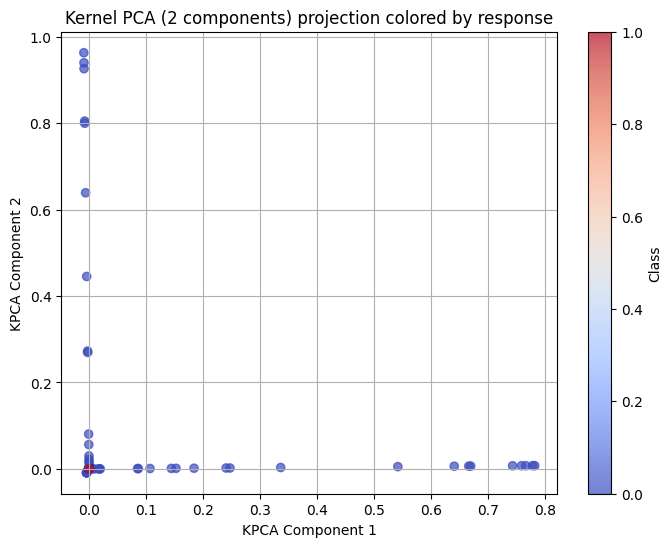

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA

# Kernel PCA with 2 components
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15, random_state=42)
X_kpca = kpca.fit_transform(X_train)

# Plot 2D projection with hue = y_train
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y_train, cmap='coolwarm', alpha=0.7)
plt.xlabel("KPCA Component 1")
plt.ylabel("KPCA Component 2")
plt.title("Kernel PCA (2 components) projection colored by response")
plt.colorbar(scatter, label="Class")
plt.grid(True)
plt.show()

## 6. Bonus Question

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, rf_clf.predict(X_test)).ravel()
total = tn + fp + fn + tp

# Proportions from the confusion matrix
tn_prop = tn / total
fp_prop = fp / total
fn_prop = fn / total
tp_prop = tp / total

# Number of customers in the new campaign
campaign_customers = 10000

# Expected numbers for the new campaign
exp_tn = tn_prop * campaign_customers
exp_fp = fp_prop * campaign_customers
exp_fn = fn_prop * campaign_customers
exp_tp = tp_prop * campaign_customers

# Risk distribution
high_risk_prop = 0.10
medium_risk_prop = 0.25
low_risk_prop = 0.65

# Profit values
profit_high_taken = 285.00
profit_high_not_taken = 300.00
profit_medium_taken = 705.00
profit_medium_not_taken = 300.00
profit_low_taken = 1225.00
profit_low_not_taken = 300.00

# a) Expected net profit
tp_high_profit = exp_tp * high_risk_prop * profit_high_taken
tp_medium_profit = exp_tp * medium_risk_prop * profit_medium_taken
tp_low_profit = exp_tp * low_risk_prop * profit_low_taken

fp_high_profit = exp_fp * high_risk_prop * profit_high_not_taken
fp_medium_profit = exp_fp * medium_risk_prop * profit_medium_not_taken
fp_low_profit = exp_fp * low_risk_prop * profit_low_not_taken

expected_profit = (tp_high_profit + tp_medium_profit + tp_low_profit) - (fp_high_profit + fp_medium_profit + fp_low_profit)
print(f'a) Expected Net Profit: {expected_profit:.2f}')

# b) Lost opportunity
fn_high_profit = exp_fn * high_risk_prop * profit_high_taken
fn_medium_profit = exp_fn * medium_risk_prop * profit_medium_taken
fn_low_profit = exp_fn * low_risk_prop * profit_low_taken

lost_opportunity = fn_high_profit + fn_medium_profit + fn_low_profit
print(f'b) Lost Opportunity of Net Profit: {lost_opportunity:.2f}')